<center><img src = "https://images.unsplash.com/photo-1581089778245-3ce67677f718?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1170&q=80"></center>

<center><h1>➗ Handwritten Equation Solver ➗</h1></center>

# Loading Libraries

In [1]:
print("Loading...")

# common libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join

# CV and Image
import cv2
from PIL import Image

# pickle
import pickle

# keras
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

print("Done")

Loading...
Done


# Creating Data

In [2]:
p = "C:/Users/PVG HD/Downloads/extracted_images/"

print("These are the folders we'll be working with :")

for f in os.listdir(p):
    print(f)

These are the folders we'll be working with :
!
(
)
+
,
-
0
1
2
3
4
5
6
7
8
9
=
A
alpha
ascii_124
b
beta
C
cos
d
Delta
div
e
exists
f
forall
forward_slash
G
gamma
geq
gt
H
i
in
infty
int
j
k
l
lambda
ldots
leq
lim
log
lt
M
mu
N
neq
o
p
phi
pi
pm
prime
q
R
rightarrow
S
sigma
sin
sqrt
sum
T
tan
theta
times
u
v
w
X
y
z
[
]
{
}


In [3]:
def load_images(folder):
    
    train_data=[]
    
    for filename in os.listdir(folder):
        
        if filename != ".directory" :

            image = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
            image = ~image

            if image is not None:

                ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
                contours, hierarchy = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
                contour = sorted(contours, key = lambda ctr: cv2.boundingRect(ctr)[0])

                a = int(28)
                b = int(28)
                maxi = 0

                for c in contour:

                    x,y,a,b=cv2.boundingRect(c)
                    maxi=max(a*b,maxi)

                    if maxi==a*b:

                        x_max=x
                        y_max=y
                        w_max=a
                        h_max=b

                im_crop = thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
                im_resize = cv2.resize(im_crop,(28,28))
                im_resize = np.reshape(im_resize,(784,1))
                train_data.append(im_resize)
            
    return train_data

# Concatenating Data of All Characters

In [13]:
data = []

data = load_images(p+"0")
for i in range(0, len(data)) :
    data[i] = np.append(data[i], ['0'])
print(len(data))

6914


In [14]:
iter = 0

for i in list(os.listdir(p)) :
    
    if i in [str(l) for l in range(1, 10)]+["+", "-", "times", "div", "="] :
    
        print("Iter :", iter)
        print("Working with the", i, "folder")

        data_i = load_images(p+i)

        if i in [str(k) for k in range(1, 10)] :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], [i])
            data = np.concatenate((data, data_i))
            print(len(data))

        if i == "+" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["10"])
            data = np.concatenate((data, data_i))
            print(len(data))

        if i == "-" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["11"])
            data = np.concatenate((data, data_i))
            print(len(data))


        if i == "times" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["12"])
            data = np.concatenate((data, data_i))
            print(len(data))

        if i == "div" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["13"])
            data = np.concatenate((data, data_i))
            print(len(data))

        if i == "=" :

            for j in range(0, len(data_i)):
                data_i[j] = np.append(data_i[j], ["14"])
            data = np.concatenate((data, data_i))
            print(len(data))                

        print()

        iter += 1

Iter : 0
Working with the + folder
32026

Iter : 1
Working with the - folder
66023

Iter : 2
Working with the 1 folder
92543

Iter : 3
Working with the 2 folder
118684

Iter : 4
Working with the 3 folder
129593

Iter : 5
Working with the 4 folder
136989

Iter : 6
Working with the 5 folder
140534

Iter : 7
Working with the 6 folder
143652

Iter : 8
Working with the 7 folder
146561

Iter : 9
Working with the 8 folder
149629

Iter : 10
Working with the 9 folder
153366

Iter : 11
Working with the = folder
166470

Iter : 12
Working with the div folder
167338

Iter : 13
Working with the times folder
170589



# Creating Training set

In [15]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_handwritten.csv',index=False)

data = pd.read_csv('train_handwritten.csv',index_col=False)
labels = data[['784']]

data.drop(data.columns[[784]],axis=1,inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,100,208,178,178,...,0,0,0,0,0,0,0,0,0,0
1,0,0,136,255,180,191,185,77,14,0,...,0,0,0,0,0,0,0,0,0,0
2,0,123,193,178,178,178,178,178,178,178,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,36,77,138,178,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,165,178,178,178,113,0,...,18,0,0,0,0,0,0,0,0,0


In [16]:
np.random.seed(1212)
labels=np.array(labels)
cat=to_categorical(labels,num_classes=15)
cat[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [17]:
temp=data.to_numpy()
X_train = temp.reshape(temp.shape[0], 28, 28, 1)
X_train.shape

(170589, 28, 28, 1)

In [18]:
l=[]
for i in range(X_train.shape[0]):
    l.append(np.array(data[i:i+1]).reshape(1,28,28))

np.random.seed(7)

# Model

In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(15, activation='softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4335      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 6, 6, 15)          0         
                                                                 
 flatten (Flatten)           (None, 540)               0

In [25]:
checkpoint = ModelCheckpoint("eq_solver.h5", monitor='accuracy', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
nn = model.fit(X_train, cat, epochs=10, batch_size=256, shuffle=True, verbose=1, callbacks=[checkpoint]).history

Epoch 1/10
667/667 [==============================] - ETA: 0s - loss: 0.6579 - accuracy: 0.8256
Epoch 1: accuracy improved from -inf to 0.82556, saving model to eq_solver.h5
667/667 [==============================] - 119s 176ms/step - loss: 0.6579 - accuracy: 0.8256
Epoch 2/10
667/667 [==============================] - ETA: 0s - loss: 0.2124 - accuracy: 0.9246
Epoch 2: accuracy improved from 0.82556 to 0.92462, saving model to eq_solver.h5
667/667 [==============================] - 117s 176ms/step - loss: 0.2124 - accuracy: 0.9246
Epoch 3/10
667/667 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9376
Epoch 3: accuracy improved from 0.92462 to 0.93764, saving model to eq_solver.h5
667/667 [==============================] - 115s 172ms/step - loss: 0.1708 - accuracy: 0.9376
Epoch 4/10
667/667 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.9437
Epoch 4: accuracy improved from 0.93764 to 0.94374, saving model to eq_solver.h5
667/667 [=======

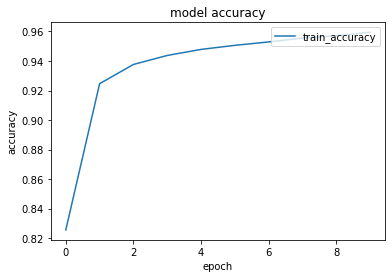

In [26]:
plt.plot(nn['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'], loc='upper right')

# Result

In [32]:
model = load_model("eq_solver.h5")

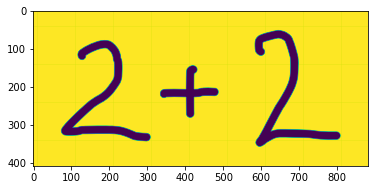

In [33]:
img = cv2.imread('C:/Users/PVG HD/Downloads/2+2.png',cv2.IMREAD_GRAYSCALE)
plt.imshow(img)

In [34]:
if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

3
0
[[74, 77, 235, 265], [335, 143, 153, 137], [584, 51, 225, 306]]


In [35]:
equation=''

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(model.predict(train_data[i]), axis=-1)
        
    for j in range(10) :
        if result[0] == j :
            equation = equation + str(j)
    
    if result[0] == 10 :
        equation = equation + "+"
    if result[0] == 11 :
        equation = equation + "-"
    if result[0] == 12 :
        equation = equation + "*"
    if result[0] == 13 :
        equation = equation + "/"
    if result[0] == 14 :
        equation = equation + "="
    
print("Your Equation :", equation)

Your Equation : 2+2


In [36]:
eval(equation)

4